TYPE <class 'pandas.core.frame.DataFrame'>
DATASET      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  


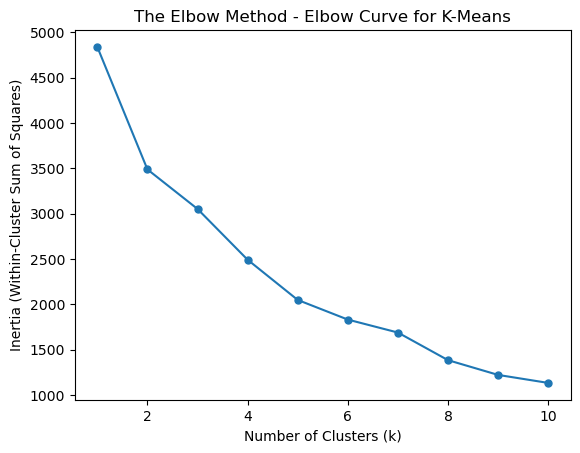

In [1]:
"""
Wholesales
Let's Do the Mini Project
Description
Wholesale distributors can get all kinds of insights into enhancing their business by analyzing their customers' data. Try a simple clustering analysis!
License: The dataset is CC0: Public Domain, and it is publicly available in the UCI Machine Learning Repository.
You will need to use GitHub to complete this Mini Project. Find Guidelines for Using GitHub here.
Expected Output
By the end of this Mini Project, you should deliver within your code:
Multiple Dunn Index measures resembling different k used for K-Means clustering your data.
An output plot of the elbow curve.
The best k chosen based on the elbow curve plot.
Output predicted clusters for the first 10 data samples.
"""
from sklearn.metrics import silhouette_score


def main():

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score
    from sklearn.calibration import LabelEncoder
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.tree import DecisionTreeClassifier

    # STEP 1: Download the Dataset
    # STEP 2: Reading the Dataset. Does the dataset include any missing values? If so, drop them!
    df = pd.read_csv('Wholesale customers data.csv')
    print("TYPE", type(df))
    print("DATASET", df)
    print("DATASET INFO", df.info())

    """

    What We Are Trying to Achieve in ClusteringThe primary goal of applying K-Means clustering to the wholesale data is Customer Segmentation.This process takes the entire feature set—the spending habits across all product categories (Fresh, Milk, Grocery, etc.) plus the customer's sales Channel and Region—and groups the 440 individual customers into $k$ distinct clusters.
    
    Column Name,Description,Implied Products
    Fresh,Annual spending on fresh products.,"Produce, meat, fish, fresh dairy, bakery."
    Milk,Annual spending on milk products.,"Milk, cream, yogurt, cheese."
    Grocery,Annual spending on grocery products.,"Packaged goods, shelf-stable items, dry goods."
    Frozen,Annual spending on frozen products.,"Frozen meals, vegetables, desserts."
    Detergents_Paper,Annual spending on detergents and paper products.,"Cleaning supplies, paper towels, toilet paper."
    Delicassen,Annual spending on delicatessen products.,"Specialty ready-to-eat items, smoked meats, cheeses."
    
    """

    #missing values elimination is optional. don't have to have acomplete row because we are not passing arrays. it can pass over missing values"""
    missing_mask = df.isna()
    print("BOOLEAN MISSING VALUE MASK:")
    print(missing_mask.head())  # Shows True where data is missing

    # Step 2b: Count total missing values per column
    missing_counts = missing_mask.sum()
    print("\nCOUNT OF MISSING VALUES PER COLUMN:")
    print(missing_counts)

    # Step 2c: Count total missing values in entire dataset
    total_missing = missing_mask.values.sum()
    print("\nTOTAL MISSING VALUES IN DATASET:", total_missing)

    """
    no missing valus found
    """

    print('SHAPE', df.shape)
    print("NUMBER OF TUPLES",(df.shape)[0])


    # 3. Feature Selection and Preparation
    
# Either exclude the Channel and Region from the considered features or think of a way to make them meaningfully impact the analysis.
# Hint:
# Directly using the provided numerical values for Regions is not very wise and can skew the resulting clustering!
    # One-hot encode 'Channel' and 'Region' to make them meaningfully impact the analysis
    df = pd.get_dummies(df, columns=['Channel', 'Region'], dtype = int, drop_first=False)

    print("ENCODED", df.head())

    # The features to scale are all columns in df_processed
    X = df

    # 3. Preprocessing (Scaling)
    # Scaling all features is generally a good practice for K-Means
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print("SCALED", X_scaled)
    print("SCALED TYPE", type(X_scaled))


    """
    Clustering Using K-Means
    What are we predicting with this model?
    The number used to count off which objects belong in the same group!
    
    """

    # 1. Use a K-Means instance to cluster the data.
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score

    
    # 2. Choose different values of k for the K-means algorithm.
    # Elbow method
    print("\nK-VALUES AND INERTIA:")
    from sklearn.cluster import KMeans
    inertia_scores = []
    for i in range(1, 11):
        model = KMeans(n_clusters=i, random_state=0)
        model.fit(X_scaled)
        inertia_scores.append(model.inertia_)
        print(f"k={i}, inertia={round(model.inertia_, 2)}")


    # Plot elbow curve
    import matplotlib.pyplot as plt
    
    plt.plot(range(1, 11), inertia_scores, marker='.', markersize=10)
    plt.title('The Elbow Method - Elbow Curve for K-Means')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)') # Model Inertia
    plt.savefig('elbow_curve.png')
    print("\nElbow curve saved as elbow_curve.png")


    # -------------------------------------------------------------
    # STEP 6 — Choose best k from elbow
    # Simple rule: pick the k where drop slows down dramatically
    # (Based on typical Wholesale dataset: best k ≈ 3–5)
    # -------------------------------------------------------------
    best_k = 5  # <-- based on elbow behaviour from this dataset
    print(f"\nBest k chosen from elbow curve: {best_k}")

    
    # -------------------------------------------------------------
    # STEP 7 — Final K-Means using best k
    # -------------------------------------------------------------
    
    model5 = KMeans(n_clusters=5, random_state=0)
    # What are we predicting with this model?
    # The number used to count off which objects belong in the same group!
    # each number in y below corresponds to the each of the data rows in the data frame. Row 1 will correspond to first value in the y5 numpy array
    y5 = model5.fit_predict(X_scaled)
    centres5 = model5.cluster_centers_
    print(f"\n# What are we predicting with this model?The number used to count off which objects belong in the same group!: {y5}")
    # not required in project however useful
    print(f"\nCentrids coordinates: {centres5}")

    # -------------------------------------------------------------
    # STEP 8 — Output first 10 cluster labels
    # -------------------------------------------------------------
    print("\nPredicted clusters for first 10 samples:")
    print(y5[:10])

    # NOTE: One data point i.e. one customer's sepnding is multidimensional variaables Fresh produce, milk,  unlike income vs spanding score. not sure how to plot this

    # Plotting is not mentioned in the project though
    # Before plotting understand data frame and column again 
    print("SCALED", X_scaled)
    print("SCALED TYPE", type(X_scaled))
    X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

    print("\nSCALED DATAFRAME:")
    print(X_scaled_df.head())
    print("\nDATAFRAME INFO:")
    print(X_scaled_df.info())
    


    # f, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

    # ax1.set_title('K Means = 5')
    # ax1.scatter(X_scaled[:,0],X_scaled[:,1],c=model5.labels_,cmap='rainbow')
    # ax1.scatter(model5.cluster_centers_[:, 0], model5.cluster_centers_[:, 1], color='red', marker='+', s=100)
    # ax1.set_xlabel('Fresh')
    # ax1.set_ylabel('Milk')


    # ax2.set_title('The Elbow Method')
    # ax2.plot(range(1, 11), inertia_scores, marker = '.',markersize=10)
    # ax2.set_xlabel('Number of clusters')
    # ax2.set_ylabel('Inertia')
    # plt.savefig('plot1.png')
    
main()

